In [1]:
! gdalinfo /vsis3/dev-et-data/tony/gl_cog.tif | egrep 'COMPRESSION|Block'

  COMPRESSION=DEFLATE
Band 1 Block=256x256 Type=Float32, ColorInterp=Gray


In [2]:
!  gdalinfo /vsis3/dev-et-data/tony/gl_stripped.tif | egrep 'COMPRESSION|Block'

Band 1 Block=4757x1 Type=Float32, ColorInterp=Gray


In [3]:
import matplotlib.pyplot as pyplot
from rasterio.plot import show

def my_plot(array):
    cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r']
    axs=()
    fig, axs = pyplot.subplots(1,8, figsize=(21,21))
    for i in range(0,8):
        show(array, ax=axs[i], cmap=cmaps[i], title=cmaps[i])
    pyplot.show()

In [4]:
import rasterio as rio

(4805, 4757)


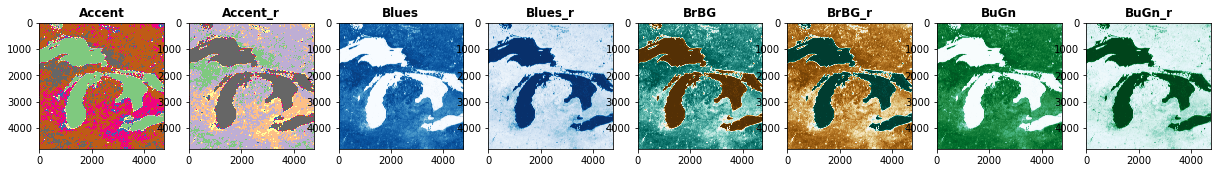

CPU times: user 5.72 s, sys: 783 ms, total: 6.5 s
Wall time: 7.9 s


In [5]:
%%time

tif = '/vsis3/dev-et-data/tony/gl_stripped.tif'

with rio.open(tif) as src:
    array = src.read(1)  
    print(array.shape)
    my_plot(array)

(4805, 4757)


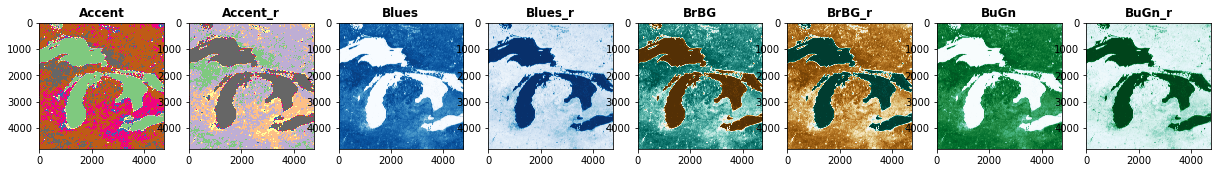

CPU times: user 6.34 s, sys: 608 ms, total: 6.95 s
Wall time: 8.07 s


In [6]:
%%time

tif = '/vsis3/dev-et-data/tony/gl_cog.tif'

with rio.open(tif) as src:
    array = src.read(1)  
    print(array.shape)
    my_plot(array)

In [7]:
%%time

tif = '/vsis3/dev-et-data/tony/gl_stripped.tif'

with rio.open(tif) as src:
    array = src.read(1)  
    print(array.shape)
    # my_plot(array)

(4805, 4757)
CPU times: user 311 ms, sys: 339 ms, total: 650 ms
Wall time: 1.71 s


In [8]:
%%time

tif = '/vsis3/dev-et-data/tony/gl_cog.tif'

with rio.open(tif) as src:
    array = src.read(1)  
    print(array.shape)
    #my_plot(array)

(4805, 4757)
CPU times: user 876 ms, sys: 174 ms, total: 1.05 s
Wall time: 1.74 s


In [18]:
# Show the geometry of scene vs AOI against a basemap
import folium

import geopandas as gpd

geoms = gpd.read_file('great_lakes_edit.geojson')
m = folium.Map([50, -90], zoom_start=7, width=900, height=350, tiles='OpenStreetMap')
folium.GeoJson(geoms).add_to(m)
m.add_child(folium.Marker(location=[43.5473, -96.7283], popup='Sioux Falls, South Dakota Tony\'s House', icon = folium.Icon(color = 'red')))
folium.LatLngPopup().add_to(m)
m

# Its really REALLY EASY to make COGs

# Its one line --> rio cogeo create ...

In [10]:
%%time
! rio cogeo create /vsis3/dev-et-data/tony/gl_stripped.tif odc_steering_council_real_time_cog.tif

Reading input: /vsis3/dev-et-data/tony/gl_stripped.tif
  [####################################]  100%          
Adding overviews...
Updating dataset tags...
Writing output to: /home/jupyter-butzer/opt/npset/02-big-super-PANGEO/odc_steering_council_real_time_cog.tif
CPU times: user 186 ms, sys: 62.9 ms, total: 249 ms
Wall time: 7.06 s


In [11]:
!gdalinfo odc_steering_council_real_time_cog.tif | egrep 'COMPRESSION|Block|Over'

  COMPRESSION=DEFLATE
Band 1 Block=512x512 Type=Float32, ColorInterp=Gray
  Overviews: 2379x2403, 1190x1202, 595x601, 298x301


# In Summary

## Its one line to create a cog

## Its maybe two lines of code to read any geotiff including cogs

## COGs save you money and time in the cloud!

# COGs save you money and time in the cloud!

In [12]:
%%time

tif = '/vsis3/dev-et-data/tony/gl_stripped.tif'
for i in range(10):
    with rio.open(tif) as src:
        array = src.read(1)  
        print(array.shape)


(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
CPU times: user 3.62 s, sys: 2.99 s, total: 6.61 s
Wall time: 18.1 s


In [13]:
%%time

tif = 'odc_steering_council_real_time_cog.tif'
for i in range(10):
    with rio.open(tif) as src:
        array = src.read(1)  
        print(array.shape)

(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
(4805, 4757)
CPU times: user 6.03 s, sys: 388 ms, total: 6.42 s
Wall time: 6.42 s


In [14]:
! date

Sat May 16 20:32:35 UTC 2020


In [15]:
! TZ=America/New_York date
! (echo Sioux Falls; TZ=America/Chicago date +"%I:%M %p")
! TZ=America/Los_Angeles date
! TZ=Australia/Sydney date
! (echo Canberra ; TZ=Australia/Canberra date)
! TZ=Australia/Tasmania date
! echo Hobart/Tasmania
! TZ=Australia/Hobart date +"%I:%M %p"
! TZ=Australia/Perth date

Sat May 16 16:32:36 EDT 2020
Sioux Falls
03:32 PM
Sat May 16 13:32:36 PDT 2020
Sun May 17 06:32:36 AEST 2020
Canberra
Sun May 17 06:32:36 AEST 2020
Sun May 17 06:32:36 AEST 2020
Hobart/Tasmania
06:32 AM
Sun May 17 04:32:36 AWST 2020
